# Benchmark notebook

Create synthetic dataset to test our creations and compare with our linear regression friend!

[-4.07098392 -4.22108966 -4.2998571  -4.33097812 -4.41601299 -4.49796221
 -4.43665962 -4.4613013  -4.54728133 -4.65577939 -4.66695915 -4.66211726
 -4.72225676 -4.82227958 -4.81827984 -4.81118534 -4.83570178 -4.99278437
 -4.91149809 -4.89534908 -4.99758889 -5.01799091 -4.96467709 -5.01649509
 -5.07204663 -5.10414142 -5.01017746 -5.08519272 -5.0060653  -4.9639984
 -5.07828693 -5.01796154 -4.89386477 -5.00939584 -4.97674087 -4.976393
 -4.98344467 -4.96964561 -4.88340352 -4.96493359 -4.95906056 -4.98591134
 -4.87935363 -4.85706938 -4.8657084  -4.77967215 -4.81228185 -4.82819934
 -4.66758448 -4.82494533 -4.69389975 -4.64779052 -4.68110266 -4.41642162
 -4.61719012 -4.42218966 -4.37505451 -4.29618859 -4.34987412 -4.16866823]


<AxesSubplot:>

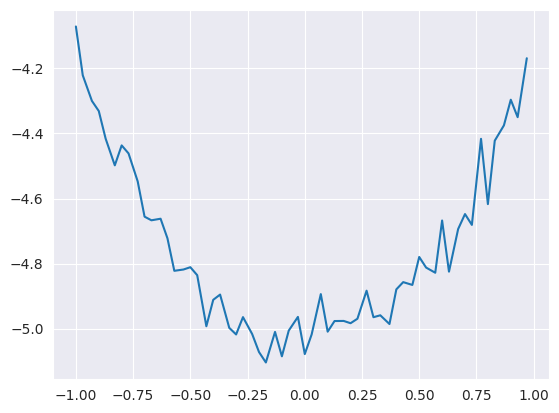

In [1]:
import numpy as np
import seaborn as sns

# Generate dataset using weird non-linear function

n_obs = 60
step = 2 / n_obs
x_1 = np.arange(-1, 1, step=step)
x_1 = np.array(list(map(lambda x: np.round(x, 2), x_1)))
x_2 = np.random.normal(0, 0.05, n_obs) - np.log(np.abs(x_1) + 1) / 5

y = x_1 ** 2 + x_2 - 5
print(y)

sns.lineplot(x=x_1, y=y)

In [2]:
# np.random.normal(0, 1, n_obs)
np.corrcoef(x_1, x_2)

array([[ 1.        , -0.00562166],
       [-0.00562166,  1.        ]])

(60, 3)
Optimal weights: [[-4.88102315]
 [-0.03497264]
 [-1.46357097]]
RMSE = 0.19592709038626538


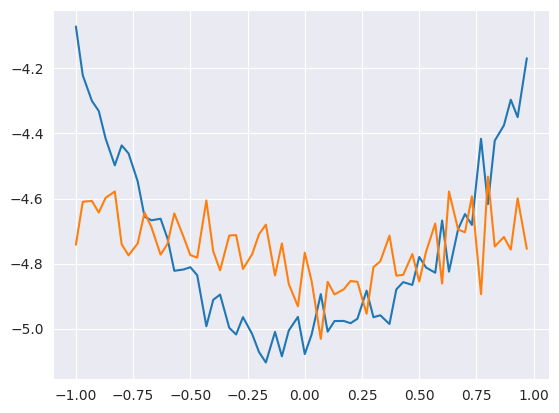

In [3]:
# Bench-mark it with a dumb model
X = np.matrix([np.ones(n_obs), x_1, x_2]).T
print(X.shape)

beta_s = np.linalg.inv((X.T * X)) * X.T * y.reshape(-1, 1)
print(f"Optimal weights: {beta_s}")

y_pred = beta_s.T * X.T
y_pred = np.squeeze(np.asarray(y_pred))

sns.lineplot(x=x_1, y=y)
sns.lineplot(x=x_1, y=y_pred)
rss = np.sqrt((y - y_pred) ** 2)
print(f"RMSE = {rss.mean()}")

In [33]:
# OK, lets go for a minimal decision tree
from core.decision_tree_mini import DT

_mobs = 20
tree = DT(minimum_obs=_mobs)
tree = tree.fit(np.asarray(X), y)
tree.print_tree(tree, col_names=['constant', 'f1', 'f2'])



|ROOT|f1(-0.803)
FINAL VAL: -4.306147331547322
|R|-f1(0.7910000000000001)
|L|--f2(-0.008113031155431449)
|L|---f1(-0.662)
FINAL VAL: -4.553596160054058
|R|----f1(-0.509)
FINAL VAL: -4.756233358597696
|R|-----f1(0.4339999999999999)
|L|------f2(-0.02034077508942139)
FINAL VAL: -4.986613025262751
FINAL VAL: -5.011140893345455
FINAL VAL: -4.72176060901165
FINAL VAL: -4.938880112030795
FINAL VAL: -4.3715275395469355


RMSE = 0.07458917260063454


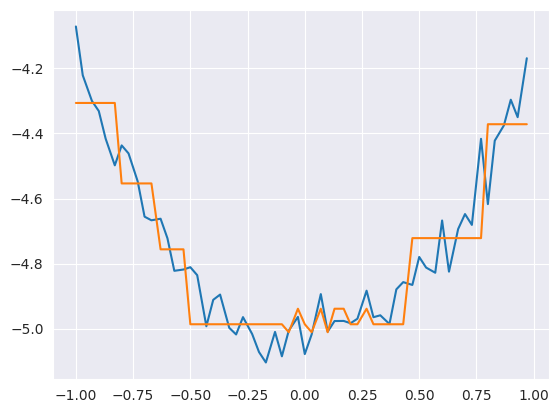

In [34]:
pred = lambda x: tree.predict(tree, x)
tree_preds = np.array([pred(np.asarray(X)[i,:]) for i in range(X.shape[0])])

sns.lineplot(x=x_1, y=y)
sns.lineplot(x=x_1, y=tree_preds)
rss = np.sqrt((y - tree_preds) ** 2)
print(f"RMSE = {rss.mean()}")



In [ ]:
# OK, our dumb tree can actually learn something, and it's better than the linear regression fren
# Lets go for EBM


